Static Simulation
=================

In this script static simulation is processed to extract results like
stress, displacement. Selecting sub parts of the results by scoping on
specific nodes or elements is also displayed here.


Perform required imports
========================

This example uses a supplied file that you
can get by importing the DPF `examples` package.


In [2]:
from ansys.dpf import post
from ansys.dpf.post import examples

Get `Simulation` object
=======================

Get the `Simulation` object that allows access to the result. The
`Simulation` object must be instantiated with the path for the result
file. For example, `"C:/Users/user/my_result.rst"` on Windows or
`"/home/user/my_result.rst"` on Linux.


In [5]:
example_path = examples.find_static_rst()
simulation = post.load_simulation(example_path)

# print the simulation to get an overview of what's available
print(simulation)

Static Mechanical Simulation.


Data Sources
------------------------------
DPF  DataSources: 
  Result files:
     result key: rst and path: d:\MizsakPeti\3_Proj\09_MM_Targy\2023\pyansys\dev\ansysvenv\lib\site-packages\ansys\dpf\core\examples\static.rst 
  Secondary files:


DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mecanic
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_tempera

In [4]:
displacement = simulation.displacement()
print(displacement)


                 results       U (m)
                 set_ids           1
    node_ids  components            
           1           X -3.3190e-22
                       Y -6.9357e-09
                       Z -3.2862e-22
          26           X  2.2303e-09
                       Y -7.1421e-09
                       Z -2.9208e-22
         ...



Select sub parts of displacement
================================



                 results       U (m)
                 set_ids           1
    node_ids  components            
           1           X -3.3190e-22
          26              2.2303e-09
          14              0.0000e+00
          12              0.0000e+00
           2             -3.0117e-22
          27              2.0908e-09
         ...



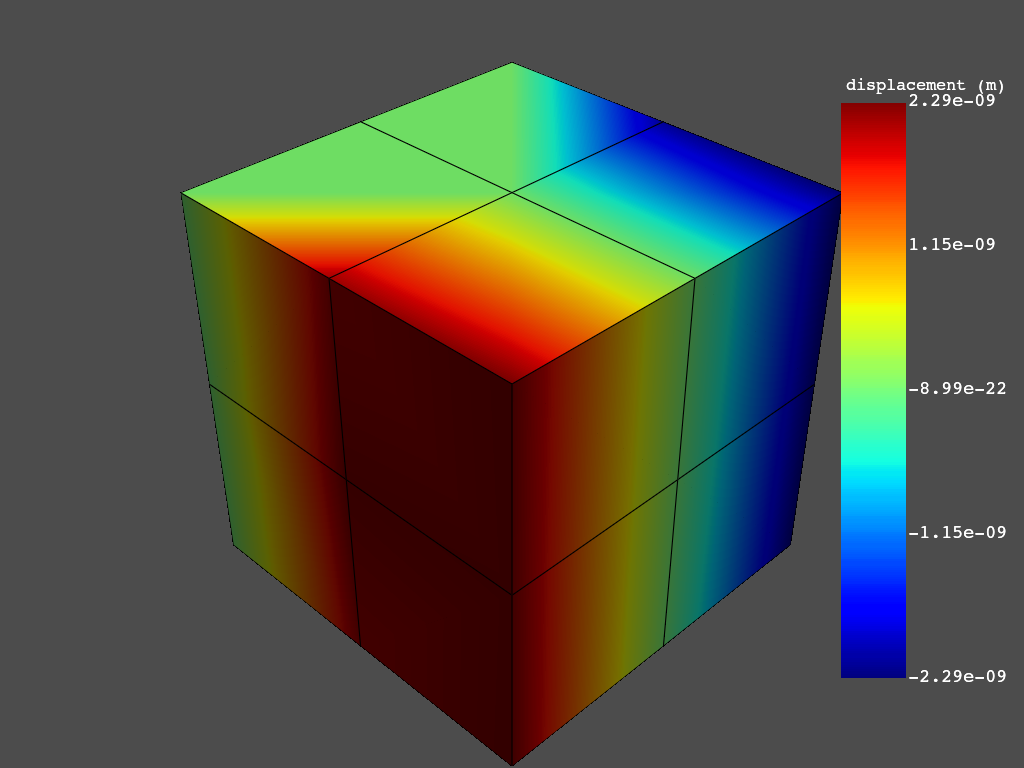

In [7]:
# To get X displacements
x_displacement = displacement.select(components="X")
print(x_displacement)

# equivalent to
x_displacement = simulation.displacement(components=["X"])
# print(x_displacement)

# plot
x_displacement.plot()

# extract displacement on specific nodes
nodes_displacement = displacement.select(node_ids=[1, 10, 100])
# nodes_displacement.plot()

# equivalent to:
nodes_displacement = simulation.displacement(node_ids=[1, 10, 100])
# print(nodes_displacement)

Compute total displacement (norm)
=================================

Compute the norm of displacement on a selection of nodes



     results     U_N (m)
     set_ids           1
    node_ids            
          11  0.0000e+00
          12  0.0000e+00
          13  0.0000e+00
          14  0.0000e+00
          15  0.0000e+00
          16  0.0000e+00
         ...



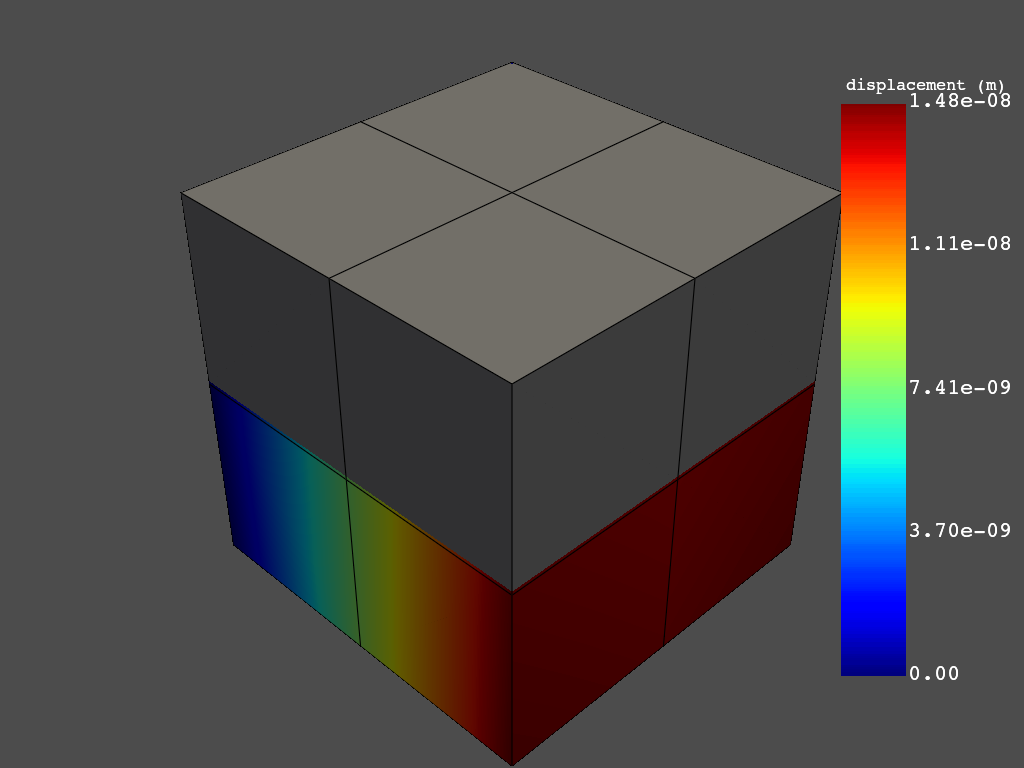

In [8]:
nodes_displacement = simulation.displacement(
    node_ids=simulation.mesh.node_ids[10:], norm=True
)
print(nodes_displacement)
nodes_displacement.plot()

Extract tensor stress, apply averaging, compute equivalent
==========================================================

Extract raw elemental nodal stresses from the rst file


In [14]:
elem_nodal_stress = simulation.stress()
print(elem_nodal_stress)

# Compute nodal stresses from the result file
nodal_stress = simulation.stress_nodal()
print(nodal_stress)


                 results      S (Pa)
                 set_ids           1
 element_ids  components            
           5      XX (1) -3.7836e+03
                  YY (1) -1.2110e+05
                  ZZ (1) -3.7836e+03
                  XY (1)  5.3318e+02
                  YZ (1) -5.3318e+02
                  XZ (1) -1.4540e+02
         ...


                 results      S (Pa)
                 set_ids           1
    node_ids  components            
           1          XX -4.8113e+03
                      YY -1.1280e+05
                      ZZ -4.8113e+03
                      XY  0.0000e+00
                      YZ  0.0000e+00
                      XZ  0.0000e+00
         ...




                 results      S (Pa)
                 set_ids           1
 element_ids  components            
           5          XX -1.2071e+04
                      YY -1.0000e+05
                      ZZ -1.2071e+04
                      XY  3.8006e+03
                      YZ -3.8006e+03
                      XZ  4.1885e+01
         ...



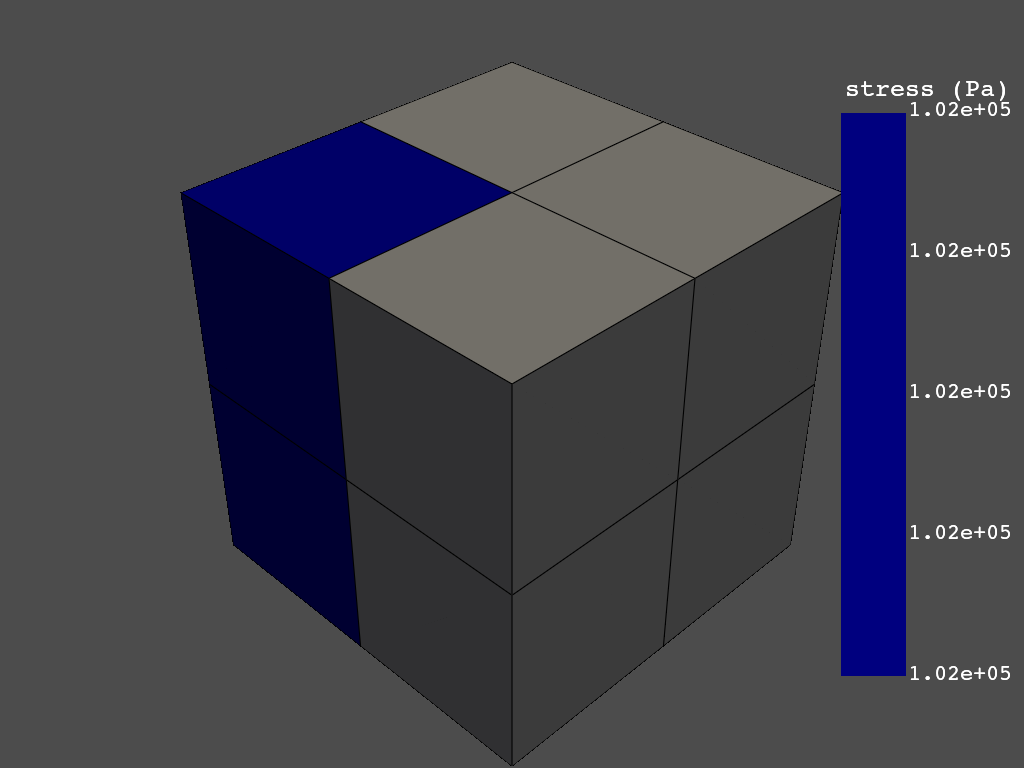

In [15]:
# Compute elemental stresses from the result file
elemental_stress = simulation.stress_elemental()
print(elemental_stress)

# Extract elemental stresses on specific elements
elemental_stress = elemental_stress.select(element_ids=[5, 6, 7])
elemental_stress.plot()


     results   S_VM (Pa)
     set_ids           1
    node_ids            
           1  1.0799e+05
          26  1.0460e+05
          14  8.1283e+04
          12  5.2324e+04
           2  1.0460e+05
          27  1.0006e+05
         ...



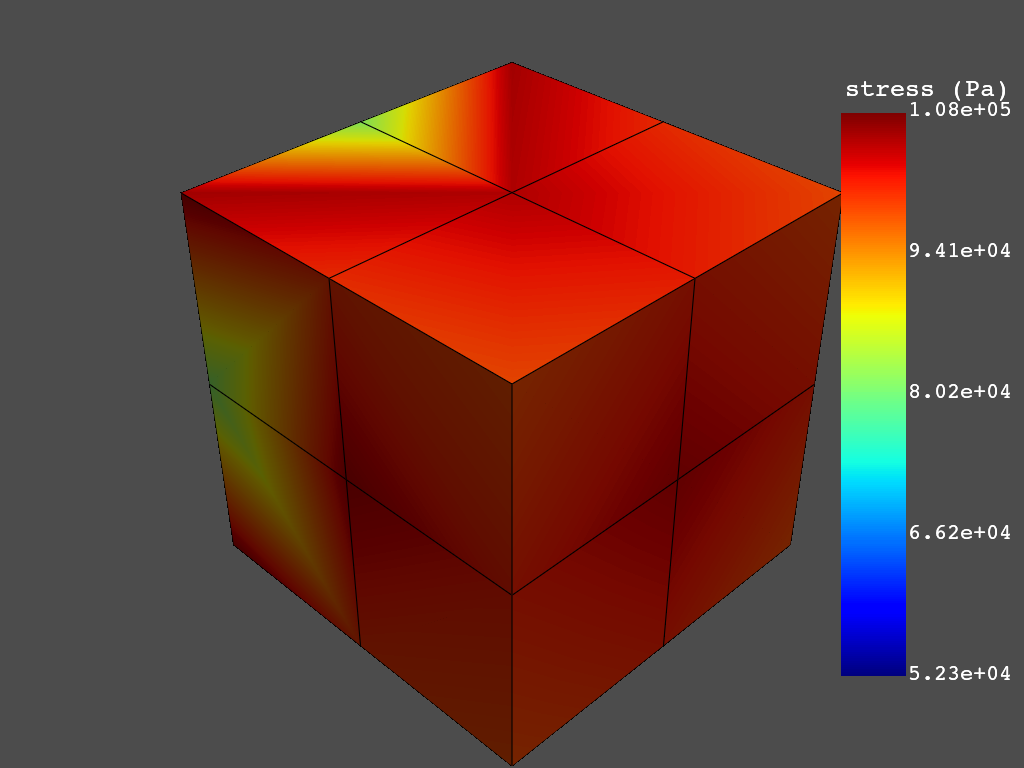

In [13]:
# Compute nodal eqv stresses from the result file
eqv_stress = simulation.stress_eqv_von_mises_nodal()
print(eqv_stress)
eqv_stress.plot()